# Data Visualization
By Maryah Garner

## Table of Contents
* [Choosing a Data Visualization Package](#Choosing_Package)
* [Setup - Load Python Packages](#setup)
* [Read in Projects Data from 2012-2021](#read)
* [Checkpoint 1](#cp1) 
* [Visualizations](#visualizations)  
* [Barplots](#barplots)
* [Presentation Ready Figures](#presentation)    
* [Checkpoint 2](#cp2)
* [Percentage of Core Cancer projects over time](#cancer_pi)
* [Stacked Barplot](#stacked)   
* [Geopandas](#geopandas)
* [Heat Map of the United States ](#hm)
* [More visuals](#More)
    * [Lineplots](#lineplots)
    * [Histagram](#Histagram)
    * [Layering in Matplotlib](#Layering)
* [Checkpoint 3](#cp3)
* [More Resources](#Resources)
* [Other Python Visualization Libraries](#Other)

## Choosing a Data Visualization Package <a class="anchor" id="Choosing_Package"></a>

There are many excellent data visualiation modules available in Python, but for the tutorial we will stick to the tried and true combination of **matplotlib** and **seaborn**. You can read more about different options for data visualization in Python in the [More Resources](#More-Resources:) section at the bottom of this notebook. 

### Matplotlib
**matplotlib** is very expressive, meaning it has functionality that can easily account for fine-tuned graph creation and adjustment. However, this also means that **matplotlib** is somewhat more complex to code. The basic steps to create graphs with this package are:
1. Prepare your data
2. Create the plot
3. Plot the plot
4. Customize plot
5. Save and show plot

More info can be found here:https://matplotlib.org/users/beginner.html

### Seaborn
**seaborn** is a higher-level visualization module, which means it is much less expressive and flexible than matplotlib, but far more concise and easier to code. In addition to matlab, this package makes it easier to
1. Use default themes that are aesthetically pleasing
2. Set custom color palettes
3. Make attractive statistical plots
4. Easily and flexibly displaying distributions
5. Visualize information from matrices and DataFrames

You can see it as a complement, not a substitute, for Matplotlib. There are some tweaks that still require Matplotlib.
More info can be found here: http://seaborn.pydata.org/api.html#api-ref

It may seem like we need to choose between these two approaches, but this is not the case! Since `seaborn` is itself written in **matplotlib** (you will sometimes see **seaborn** be called a **matplotlib** 'wrapper'), we can use **seaborn** for making graphs quickly and then **matplotlib** for specific adjustments. When you see `plt` referenced in the code below, we are using **matplotlib's** pyplot submodule.


**seaborn** also improves on **matplotlib** in important ways, such as the ability to more easily visualize regression model results, creating small multiples, enabling better color palettes, and improve default aesthetics. From [**seaborn**'s documentation](https://seaborn.pydata.org/introduction.html):

> If matplotlib 'tries to make easy things easy and hard things possible', seaborn tries to make a well-defined set of hard things easy too. 

## Setup - Load Python Packages <a class="anchor" id="setup"></a>

### Installation of Packages
The enviroment has the most commonly used packages installed so you are able to directly import them. Other packages might not be installed so we need to install them before we can import them. In this notebook we will be using the plotnine package which is not pre-installed. We can use the pip install command to install the package. On your home computer you only have to do this once. As our environment is only active for the current session we have to do this everytime we open the binder.

In [1]:
# Use pip to intall packages
# We will use the geopandas package to make a beautiful heat map of the US and the us package
%pip install geopandas
%pip install us

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import os
import glob
#from plotnine import *

import matplotlib as mplib
import matplotlib.pyplot as plt # visualization package 1
import seaborn as sns           # visualization package 2


import geopandas          #  geospatial data package 1
import us                 #  geospatial data package 2

# so images get plotted in the notebook
%matplotlib inline

## Read in Projects Data from 2012-2021  <a class="anchor" id="read"></a>

In [3]:
# Specify a path with the data folder
# Change "NAME" to your name as recorded on your computer
# path = 'C:/Users/NAME/PADM-GP_2505/Data/'
Path = '/Users/wsq/Desktop/Advanced Data Analytics and Evidence Building/PADM-GP_2505/Data'


#### Set working directory
We will change the working directory to the Projects folder. We need to do this so we can read in all of the projects files at once.

In [4]:
# use the chdir funftion from the os package to sed your working directory 
os.chdir(Path + "/Projects")

In [5]:
# Generate an empty dataframe that will hold all the patent data we have
all_projects = pd.DataFrame([])

# Now loop through each file in the folder that starts with RePORTER
# Read that file using only the columns we need
# And append it to the dataframe that we created above
# This might take a little while to run (no more than 1 minute)
for counter, file in enumerate(glob.glob("RePORTER*?")):
    print(counter,file)
    projects = pd.read_csv(file, usecols=['APPLICATION_ID','TOTAL_COST','CORE_PROJECT_NUM','FULL_PROJECT_NUM', 'FY', 'IC_NAME', 
                                          'ORG_NAME', 'ORG_STATE','PI_NAMEs','PI_NAMEs','PROJECT_START',
                                          'PROJECT_END','PROJECT_TITLE','NIH_SPENDING_CATS'], 
                           encoding='latin-1')
    projects['ORG_STATE'] = projects['ORG_STATE'].astype(str)
    projects['TOTAL_COST'] = projects['TOTAL_COST'].astype(str)
    all_projects = all_projects.append(projects)

0 RePORTER_PRJ_C_FY2017_new.csv


/var/folders/rl/4_s3mzkj6ll5h2_4qxy9sftw0000gn/T/ipykernel_13503/477606033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_projects = all_projects.append(projects)


1 RePORTER_PRJ_C_FY2021_new.csv


/var/folders/rl/4_s3mzkj6ll5h2_4qxy9sftw0000gn/T/ipykernel_13503/477606033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_projects = all_projects.append(projects)


2 RePORTER_PRJ_C_FY2020_new.csv


/var/folders/rl/4_s3mzkj6ll5h2_4qxy9sftw0000gn/T/ipykernel_13503/477606033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_projects = all_projects.append(projects)


3 RePORTER_PRJ_C_FY2016_new.csv


/var/folders/rl/4_s3mzkj6ll5h2_4qxy9sftw0000gn/T/ipykernel_13503/477606033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_projects = all_projects.append(projects)


4 RePORTER_PRJ_C_FY2014_new.csv


/var/folders/rl/4_s3mzkj6ll5h2_4qxy9sftw0000gn/T/ipykernel_13503/477606033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_projects = all_projects.append(projects)


5 RePORTER_PRJ_C_FY2015_new.csv


/var/folders/rl/4_s3mzkj6ll5h2_4qxy9sftw0000gn/T/ipykernel_13503/477606033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_projects = all_projects.append(projects)


6 RePORTER_PRJ_C_FY2019_new.csv


/var/folders/rl/4_s3mzkj6ll5h2_4qxy9sftw0000gn/T/ipykernel_13503/477606033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_projects = all_projects.append(projects)


7 RePORTER_PRJ_C_FY2018_new.csv


/var/folders/rl/4_s3mzkj6ll5h2_4qxy9sftw0000gn/T/ipykernel_13503/477606033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_projects = all_projects.append(projects)


8 RePORTER_PRJ_C_FY2013_new.csv


/var/folders/rl/4_s3mzkj6ll5h2_4qxy9sftw0000gn/T/ipykernel_13503/477606033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_projects = all_projects.append(projects)


9 RePORTER_PRJ_C_FY2012_new.csv


/var/folders/rl/4_s3mzkj6ll5h2_4qxy9sftw0000gn/T/ipykernel_13503/477606033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_projects = all_projects.append(projects)


#### Subset for Cancer Projects
In this notebook we want to focus on Cancer research. In the previous notebooks we have focuesd on projects funded by the `NATIONAL CANCER INSTITUTE `. In this notebook we will select all Projects that have the word Cancer in the NIH_SPENDING_CATS. 

In [6]:
# Subsetting by a keyword in a string using str.contains()
# Show all projects which contain word "Cancer" in the NIH_SPENDING_CATS variable
cancer_projects = all_projects[all_projects['NIH_SPENDING_CATS'].str.contains('Cancer', na = False)]

# Reset index
cancer_projects = cancer_projects.reset_index()

# view the first 5 observations
cancer_projects.head()

,index,APPLICATION_ID,CORE_PROJECT_NUM,FULL_PROJECT_NUM,FY,IC_NAME,NIH_SPENDING_CATS,ORG_NAME,ORG_STATE,PI_NAMEs,PROJECT_START,PROJECT_END,PROJECT_TITLE,TOTAL_COST
0,0,9471696,R13MD012457,1R13MD012457-01,2017,National Institute on Minority Health and Heal...,Cancer; Health Disparities; Minority Health; P...,UNIVERSITY OF TEXAS HLTH SCIENCE CENTER,TX,"RAMIREZ, AMELIE G;",9/19/17,8/31/19,Advancing the Science of Cancer in Latinos,49935.0
1,10,9275240,F30CA206240,5F30CA206240-02,2017,NATIONAL CANCER INSTITUTE,Cancer; Digestive Diseases; Genetics; Pancreat...,STATE UNIVERSITY NEW YORK STONY BROOK,NY,"HE, PING ;",6/1/16,5/31/20,Mechanisms of Pancreatic Carcinogenesis,31678.0
2,15,9308912,K99CA207744,5K99CA207744-02,2017,NATIONAL CANCER INSTITUTE,Bioengineering; Biomedical Imaging; Breast Can...,MASSACHUSETTS GENERAL HOSPITAL,MA,"MILLER, MILES A;",7/1/16,6/30/18,Single Cell In Vivo Imaging Technology to Anal...,179280.0
3,21,9189691,R01CA174683,5R01CA174683-04,2017,NATIONAL CANCER INSTITUTE,Behavioral and Social Science; Cancer; Childho...,UNIVERSITY OF ALABAMA AT BIRMINGHAM,AL,"BHATIA, SMITA (contact); LANDIER, WENDY ;",1/7/14,12/31/18,Comprehensive Approach to Improve Medicine Adh...,606475.0
4,61,9212114,F31CA189437,5F31CA189437-03,2017,NATIONAL CANCER INSTITUTE,Biotechnology; Cancer; Cancer Genomics; Geneti...,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,MA,"WANG, TIM ;",3/15/15,5/1/17,Improving targeted therapies through functiona...,21152.0


# Checkpoint 1: Subset data for your project  <a class="anchor" id="cp1"></a>

Make a dataframe called Project_data that is a subset of the all_projects data frame where the NIH_SPENDING_CATS is equal to a specific spending category, or the string contains a specific key ward (as we did above with Cancer). (1 point)

Use the FY variable to subset your Project_data dataframe to the fiscal years you would like to include in the analysis for your project. (Please keep this dataframe named Project_data). (1 point) 

### <div class="alert alert-success">I chose the specific NIH spending category of "HPV and/or Cervical Cancer Vaccines".</div>

In [7]:
# Subsetting by a keyword in a string using str.contains()
# Show all projects which contain word "HPV" in the NIH_SPENDING_CATS variable
Project_data = all_projects[all_projects['NIH_SPENDING_CATS'].str.contains('HPV and/or Cervical Cancer Vaccines', na = False)]
# Reset index
Project_data = Project_data.reset_index()

Project_data.head()

,index,APPLICATION_ID,CORE_PROJECT_NUM,FULL_PROJECT_NUM,FY,IC_NAME,NIH_SPENDING_CATS,ORG_NAME,ORG_STATE,PI_NAMEs,PROJECT_START,PROJECT_END,PROJECT_TITLE,TOTAL_COST
0,506,9446869,NaN,272200800005C-25-0-6,2017,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,Biotechnology; Cancer; Clinical Research; Clin...,EMORY UNIVERSITY,GA,"MULLIGAN, MARK ;",11/1/07,6/30/17,VACCINE AND EVALUTION TREATMENT UNITS:PHASE I ...,3039.0
1,2221,9212635,K01AI106961,5K01AI106961-04,2017,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,Behavioral and Social Science; Biotechnology; ...,EMORY UNIVERSITY,GA,"BEDNARCZYK, ROBERT A.;",2/1/14,1/31/19,A Practice-Provider-Parent-Adolescent interven...,114370.0
2,3329,9220396,R01CA213130,1R01CA213130-01,2017,NATIONAL CANCER INSTITUTE,Biotechnology; Cancer; Clinical Research; Clin...,FRED HUTCHINSON CANCER RESEARCH CENTER,WA,"MADELEINE, MARGARET M (contact); WALD, ANNA ;",2/22/17,1/31/22,Therapeutic use of HPV L1 Vaccine in Anogenita...,767849.0
3,3555,9322033,S06GM123547,1S06GM123547-01,2017,NATIONAL INSTITUTE OF GENERAL MEDICAL SCIENCES,Adolescent Sexual Activity; American Indian or...,WHITE MOUNTAIN APACHE TRIBE,AZ,"CRAIG, MARIDDIE J;",NaN,NaN,"My Health, My Future: Promotion of Protective ...",nan
4,3716,9232059,R21AI121822,5R21AI121822-02,2017,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,Cancer; Cervical Cancer; Contraception/Reprodu...,PENNSYLVANIA STATE UNIV HERSHEY MED CTR,PA,"CHRISTENSEN, NEIL D (contact); HU, JIAFEN ;",3/1/16,2/28/19,Role of estrous cycle and contraceptives in an...,193375.0


### <div class="alert alert-success">I included the fiscal years from 2015 to 2021.</div>

In [8]:
Project_data = Project_data[Project_data.FY.isin([2015,2016,2017,2018,2019,2020,2021])]
Project_data.head(2)

,index,APPLICATION_ID,CORE_PROJECT_NUM,FULL_PROJECT_NUM,FY,IC_NAME,NIH_SPENDING_CATS,ORG_NAME,ORG_STATE,PI_NAMEs,PROJECT_START,PROJECT_END,PROJECT_TITLE,TOTAL_COST
0,506,9446869,NaN,272200800005C-25-0-6,2017,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,Biotechnology; Cancer; Clinical Research; Clin...,EMORY UNIVERSITY,GA,"MULLIGAN, MARK ;",11/1/07,6/30/17,VACCINE AND EVALUTION TREATMENT UNITS:PHASE I ...,3039.0
1,2221,9212635,K01AI106961,5K01AI106961-04,2017,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,Behavioral and Social Science; Biotechnology; ...,EMORY UNIVERSITY,GA,"BEDNARCZYK, ROBERT A.;",2/1/14,1/31/19,A Practice-Provider-Parent-Adolescent interven...,114370.0


In [9]:
Project_data.tail(2)

,index,APPLICATION_ID,CORE_PROJECT_NUM,FULL_PROJECT_NUM,FY,IC_NAME,NIH_SPENDING_CATS,ORG_NAME,ORG_STATE,PI_NAMEs,PROJECT_START,PROJECT_END,PROJECT_TITLE,TOTAL_COST
593,76422,9554792,U54CA143727,5U54CA143727-09,2018,NATIONAL CANCER INSTITUTE,Burden of Illness; Cancer; Cervical Cancer; Cl...,UNIVERSITY OF HAWAII AT MANOA,HI,"PALAFOX, NEAL A.;",NaN,NaN,Outreach Core,nan
594,77785,9537431,R01AI123204,5R01AI123204-02,2018,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,Cancer; Cervical Cancer; Clinical Research; Cl...,YALE UNIVERSITY,CT,"NICCOLAI, LINDA M;",08/01/2017,07/31/2021,Effectiveness of HPV Vaccine by Age at Immuniz...,444738.0


# Visualizations  <a class="anchor" id="visualizations"></a>
Before generating the graph you first want to think about the information you are trying to convey and what your visualization should look like. It might help to draw a sketch on paper first. Once you know what type of graph is best suited to illustrate what you want to show, you will need to think about how to prepare the data you need for the graph. For your presentations, you should only include figures that serve a purpose, and convey important information to your audience.

# Checkpoint 2: Make a Barplot  <a class="anchor" id="cp2"></a>
Using your `Project_data` dataframe make a Presentation ready barplot.  
- Prepare the data to make your barplot. You can graph the number of core projects each year as we did above, but you don't have to. You can be more creative with your barplot to depict an important aspect of your research project. (1 point)
- Give your barplot a title that tells your audience the important take away of your visualization (1 point)
- Change the color of the bars (1 point)
- Change the x and y axis labels and make sure you include a data source. (1 point)


### <div class="alert alert-success"> This is my data preparation process. </div>

## Barplots  <a class="anchor" id="barplots "></a>

In [10]:
# calculate how many "HPV and/or Cervical Cancer Vaccines" Projects each IC has
IC = Project_data.groupby(['IC_NAME'])['CORE_PROJECT_NUM'].nunique().sort_values(ascending=False)

# Convert into a dataframe and reset index
IC = IC.to_frame().reset_index()

# Rename FULL_PROJECT_NUM to Total_Projects
IC.rename(columns={'CORE_PROJECT_NUM':'Total_Project_data'}, inplace = True)

# View the first 8 observations 
IC.head()

,IC_NAME,Total_Project_data
0,NATIONAL CANCER INSTITUTE,125
1,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,20
2,EUNICE KENNEDY SHRIVER NATIONAL INSTITUTE OF C...,9
3,National Institute on Minority Health and Heal...,9
4,FOGARTY INTERNATIONAL CENTER,2


We can see that the NATIONAL CANCER INSTITUTE sponsors the most "HPV and/or Cervical Cancer Vaccines" projects by far, but we can create a visualization to process this information easier. This visualization will be used for data exploration, so we will not take time to make it pretty.

In [11]:
## Barplot function
# Note we can reference column names (in quotes) in the specified data:
#sns.barplot(x='IC_NAME', 
            #y='Total_Project_data', 
            #data = IC,
            #color='#58CE8C')

# Rotate the CI names on the x-axis 90 degrees
#plt.xticks(rotation=90, ha='right')
#plt.show()

From this visual, we can see that only looking at projects sponsored by the NCI will cover most Cancer projects, but we might not want to leave out those other projects. In this notebook we will not be subsetting for NCI projects.

This visual is just used to help us understand our data, so we will not waste time on perfecting it. 

### Number of Core "HPV and/or Cervical Cancer Vaccines" Projects Annually 
Next we want to see how the number of Cancer projets changes over the years. 
We will begin with preparing the data, then we will make a quick and easy graph. After that, we will update the figure to get it presentation ready.

#### Preparing the Annual HPVCCV data

In [12]:
# calculate how many Cancer Core Projects each fiscal year
Projects_Annual = Project_data.groupby(['FY'])['CORE_PROJECT_NUM'].nunique()

# Convert into a dataframe and reset index
Projects_Annual = Projects_Annual.to_frame().reset_index()

# Rename CORE_PROJECT_NUM to Cancer_Core_Projects
Projects_Annual.rename(columns={'CORE_PROJECT_NUM':'Core_Projects'}, inplace = True)

# View the first 8 observations 
Projects_Annual.head(10)

,FY,Core_Projects
0,2015,56
1,2016,57
2,2017,61
3,2018,52
4,2019,61
5,2020,66
6,2021,70


#### Make a quick and easy barplot

In [13]:
## Barplot function
# Note we can reference column names (in quotes) in the specified data:
#sns.barplot(x = 'FY', 
           # y = 'Core_Projects', 
           # data = Projects_Annual,
           # color='#58CE8C')
#plt.show()

## Presentation Ready Figures <a class="anchor" id="presentation"></a>

### An Important Note on Graph Titles:

The title of a visualization occupies the most valuable real estate on the page. If nothing else, you can be reasonably sure a viewer will at least read the title and glance at your visualization. This is why you want to put thought into making a clear and effective title that acts as a **narrative** for your chart highlighting the **Important takeaway** of the figure. Many novice visualizers default to an **explanatory** title, something like: "Average Projects over Time (2012-2021)". This title is correct - it just isn't very useful. This is particularly true since any good graph will have explained what the visualization is through the axes and legends. Instead, use the title to reinforce and explain the core point of the visualization. It should answer the question "Why is this graph important?" and focus the viewer onto the most critical take-away.

### A Note on Data Sourcing

Data sourcing is a critical aspect of any data visualization. Although here we are simply referencing the agencies that created the data, it is ideal to provide as direct of a path as possible for the viewer to find the data the graph is based on. When this is not possible (e.g. the data is sequestered), directing the viewer to documentation or methodology for the data is a good alternative. Regardless, providing clear sourcing for the underlying data is an **absolutely requirement** of any respectable visualization, and further builds trusts and enables reproducibility.

#### A Note on Colors Selection
The colors used in your visualization should convey meaning. Using different colors without purpose can lead to un-necessary confusion where your audience will start looking for meaning in the colors. 


### <div class="alert alert-success">This is my Checkpoint 1 bar plot. HPVCCV stands for "HPV and/or Cervical Cancer Vaccines".</div>


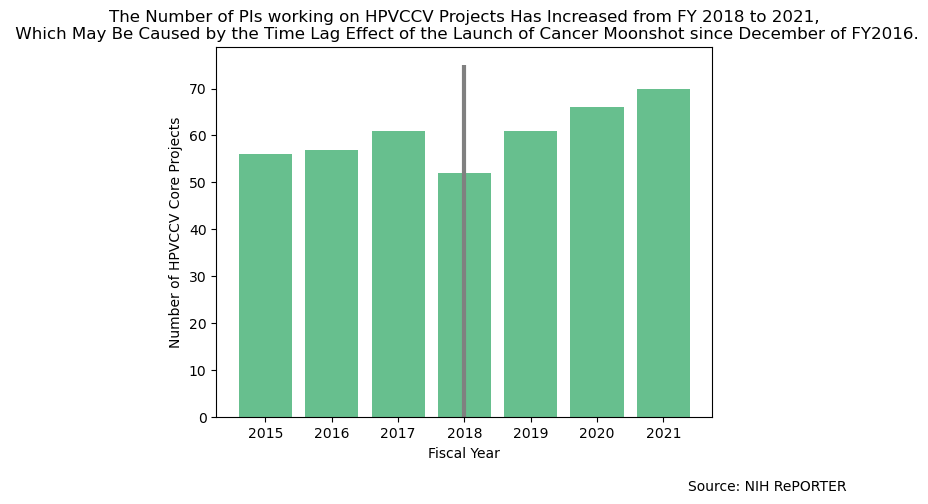

In [14]:
## Barplot function
# Note we can reference column names (in quotes) in the specified data:
# Change the color to a lovely green color
yearly_projects = sns.barplot(x = 'FY', 
                             y = 'Core_Projects', 
                             data = Projects_Annual, 
                             color='#58CE8C')
# Change the x-axis label
yearly_projects.set(xlabel ="Fiscal Year", 
# Change the y-axis label
                    ylabel = "Number of HPVCCV Core Projects",
# Change the title
                    title = "The Number of PIs working on HPVCCV Projects Has Increased from FY 2018 to 2021,\n Which May Be Caused by the Time Lag Effect of the Launch of Cancer Moonshot since December of FY2016.")

# Add a vertical year in 2018
plt.vlines(x = 3, ymin = 0, ymax = 75, color = 'gray', linewidth=3)

# add a data source 
# xy are measured in percent of axes length, from bottom left of graph:
plt.annotate('Source: NIH RePORTER', xy=(0.95,-0.20), xycoords="axes fraction")

plt.show()

### Getting the barplot Presentation ready <a class="anchor" id="barplot_presentation"></a>
You may want to include a figure like this in your presentation. As is, this figure is inadequate for conveying information to your audience.
- First, we want to change the color
- Second, We will change the x- and y-axis labels
- Next, we will give the figure a title that tells the audience what you are trying to convey with the figure
- Next, we will add a black line to indicate what year the Cancer Moonshot began.
- Finally, we will add a source to the data

#### Using Hex Codes for Color
In the graph above, you can see I set the color of the graph with pund sign `#` followed by a series of six numbers. This is a hexcode - which is short for hexadecimal code. A hexadecimal code lets you specify one of over 16 million colors using combinations of red, green, and blue. It first has two digits for red, then two digits for green, and lastly two digits for blue: `#RRGGBB`

### Percentage of Core Cancer projects over time  <a class="anchor" id="cancer_pi"></a>
Next we will look at the number of PIs working on Cancer projects over time and how it compares to the number of PIs working on non-cancer projects

# Checkpoint 3 Visualization of you choice  <a class="anchor" id="cp3"></a>
Create another presentation ready visualization using your `projects_data` (any type of graph except a barplot (because you have already done that) or a pie chart (because they are not good at conveying information). 
- Prepare the data for your visualization (1 point)
- Give your barplot a title that tells your audience the important take away of your visualization (1 point)
- Change the color of the visualization (1 point)
- Change the x and y axis labels and make sure you include a data source. (1 point)


### <div class="alert alert-success"> This is my data preparation process. </div>

### Cleaning PI_NAMEs  <a class="anchor" id="pi"></a>
Using the same code in the `Record_Linkage_and_measurement.ipynb` notebook we will clean the PI names 

In [15]:
# Make a temperary dataframe that creates an observation for each PI. 
# Use the explode function to split the PI_Names at the ;
temp = Project_data['PI_NAMEs'].str.split(';').explode().reset_index()

# Rename the PI_NAMEs variable
temp = temp.rename(columns = {'PI_NAMEs': 'PI_NAME'})

# Only keep observations in the temp dataframe where PI_NAME is not an empty string
temp = temp[temp['PI_NAME'] !=""]

# For the the PI_NAME variable, use the str.replace fundtion to replace ` (contact)` with nothing 
temp['PI_NAME'] = temp['PI_NAME'].str.replace(' \(contact\)', '')

# look at the first 5 observations
temp.head()

/var/folders/rl/4_s3mzkj6ll5h2_4qxy9sftw0000gn/T/ipykernel_13503/2786476199.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  temp['PI_NAME'] = temp['PI_NAME'].str.replace(' \(contact\)', '')


,index,PI_NAME
0,0,"MULLIGAN, MARK"
2,1,"BEDNARCZYK, ROBERT A."
4,2,"MADELEINE, MARGARET M"
5,2,"WALD, ANNA"
7,3,"CRAIG, MARIDDIE J"


In [16]:
# Reset the index
Project_data2 = Project_data.reset_index()

Project_data2[['index','APPLICATION_ID','PI_NAMEs']].head(10)

,index,APPLICATION_ID,PI_NAMEs
0,506,9446869,"MULLIGAN, MARK ;"
1,2221,9212635,"BEDNARCZYK, ROBERT A.;"
2,3329,9220396,"MADELEINE, MARGARET M (contact); WALD, ANNA ;"
3,3555,9322033,"CRAIG, MARIDDIE J;"
4,3716,9232059,"CHRISTENSEN, NEIL D (contact); HU, JIAFEN ;"
5,4748,9333200,"GARCEA, ROBERT L;"
6,5159,9349470,"GUPTA, SAMIR ;"
7,5835,9339317,"KEMPE, ALLISON ; SZILAGYI, PETER G (contact);"
8,6467,9317451,"WOODALL, W GILL;"
9,7553,9265795,"BALDWIN, AUSTIN S; TIRO, JASMIN ANITA (contact);"


In [17]:
Project_data2 = Project_data2.reset_index(drop=True)

In [18]:
Project_data2[['level_0','index','APPLICATION_ID','PI_NAMEs']].head(10)

,level_0,index,APPLICATION_ID,PI_NAMEs
0,0,506,9446869,"MULLIGAN, MARK ;"
1,1,2221,9212635,"BEDNARCZYK, ROBERT A.;"
2,2,3329,9220396,"MADELEINE, MARGARET M (contact); WALD, ANNA ;"
3,3,3555,9322033,"CRAIG, MARIDDIE J;"
4,4,3716,9232059,"CHRISTENSEN, NEIL D (contact); HU, JIAFEN ;"
5,5,4748,9333200,"GARCEA, ROBERT L;"
6,6,5159,9349470,"GUPTA, SAMIR ;"
7,7,5835,9339317,"KEMPE, ALLISON ; SZILAGYI, PETER G (contact);"
8,8,6467,9317451,"WOODALL, W GILL;"
9,9,7553,9265795,"BALDWIN, AUSTIN S; TIRO, JASMIN ANITA (contact);"


In [19]:
# Merge this temperary dataframe with cancer_projects2
# Reset the index
Project_data3 = Project_data2.merge(temp, left_on = 'level_0', right_on='index') 

# look at the first 2 observations
Project_data3.head(2)

,level_0,index_x,APPLICATION_ID,CORE_PROJECT_NUM,FULL_PROJECT_NUM,FY,IC_NAME,NIH_SPENDING_CATS,ORG_NAME,ORG_STATE,PI_NAMEs,PROJECT_START,PROJECT_END,PROJECT_TITLE,TOTAL_COST,index_y,PI_NAME
0,0,506,9446869,NaN,272200800005C-25-0-6,2017,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,Biotechnology; Cancer; Clinical Research; Clin...,EMORY UNIVERSITY,GA,"MULLIGAN, MARK ;",11/1/07,6/30/17,VACCINE AND EVALUTION TREATMENT UNITS:PHASE I ...,3039.0,0,"MULLIGAN, MARK"
1,1,2221,9212635,K01AI106961,5K01AI106961-04,2017,NATIONAL INSTITUTE OF ALLERGY AND INFECTIOUS D...,Behavioral and Social Science; Biotechnology; ...,EMORY UNIVERSITY,GA,"BEDNARCZYK, ROBERT A.;",2/1/14,1/31/19,A Practice-Provider-Parent-Adolescent interven...,114370.0,1,"BEDNARCZYK, ROBERT A."


In [20]:
# Look at the first 6 observations for select variables
Project_data3[['APPLICATION_ID','PI_NAMEs','PI_NAME']].head(6)

,APPLICATION_ID,PI_NAMEs,PI_NAME
0,9446869,"MULLIGAN, MARK ;","MULLIGAN, MARK"
1,9212635,"BEDNARCZYK, ROBERT A.;","BEDNARCZYK, ROBERT A."
2,9220396,"MADELEINE, MARGARET M (contact); WALD, ANNA ;","MADELEINE, MARGARET M"
3,9220396,"MADELEINE, MARGARET M (contact); WALD, ANNA ;","WALD, ANNA"
4,9322033,"CRAIG, MARIDDIE J;","CRAIG, MARIDDIE J"
5,9232059,"CHRISTENSEN, NEIL D (contact); HU, JIAFEN ;","CHRISTENSEN, NEIL D"


In [21]:
# Convert scientific notation to a full float
pd.set_option('display.float_format', '{:.2f}'.format)

#### Number of PI's working on Cancer projects each year
We will calculate the number of PI's working on Cancer projects each fiscal year

In [22]:
# calculate how many PIs are working on Cancer Projects each fiscal year
Project_PI = Project_data3.groupby(['FY'])['PI_NAMEs'].nunique()

# Convert into a dataframe and reset index
Project_PI = Project_PI.to_frame().reset_index()

# Rename CORE_PROJECT_NUM to Cancer_Core_Projects
Project_PI.rename(columns={'PI_NAMEs':'Project_PIs'}, inplace = True)

# View the first 8 observations 
Project_PI.head(10)

,FY,Project_PIs
0,2015,56
1,2016,66
2,2017,65
3,2018,56
4,2019,63
5,2020,68
6,2021,82


#### Number of PI's working on projects each yeah
We will calculate the number of PI's working on any project each fiscal year

In [23]:
# calculate how many PIs are working on all Projects each fiscal year
All_PI = all_projects.groupby(['FY'])['PI_NAMEs'].nunique()

# Convert into a dataframe and reset index
All_PI = All_PI.to_frame().reset_index()

# Rename CORE_PROJECT_NUM to Cancer_Core_Projects
All_PI.rename(columns={'PI_NAMEs':'All_PIs'}, inplace = True)

# select All_PIs whose FY isin 2015-2021
All_PI = All_PI[All_PI.FY.isin([2015,2016,2017,2018,2019,2020,2021])]

# View the first 8 observations 
All_PI.head()

,FY,All_PIs
3,2015,47624
4,2016,48115
5,2017,48925
6,2018,51501
7,2019,54112


#### Percentage of PIs working on Cancer Progects each year
First we are going to merge together the All_PI dataframe and the Cancer_PI data frame, then we will calculate the percentage of all projects that are cancer projects and the percentage of all projects that are not cancer projects.

In [24]:
# Marge together  `All_Annual` and `Cancer_Annual on PI_NAME`, creating a new data frame called `Annual.`
# Use an outer merge. 
Annual_PI = pd.merge(All_PI, Project_PI, on='FY', how = 'outer')

# View the dataframe
Annual_PI 

,FY,All_PIs,Project_PIs
0,2015,47624,56
1,2016,48115,66
2,2017,48925,65
3,2018,51501,56
4,2019,54112,63
5,2020,56201,68
6,2021,57536,82


We are going to add a new column that reports the percent of all core projects that are cancer related 

In [25]:
# Calculate the percent of PIs who work on cancer research and round to the tenth decimal place 
Annual_PI['Percent_Project'] = round((Annual_PI['Project_PIs']/Annual_PI['All_PIs'])*100,2)

# Calculate the percent of PIs who did not work on cancer research 
Annual_PI['Percent_Not_Project'] = 100 - Annual_PI['Percent_Project']

# Save only the FY, Percent_Cancer and Percent_Not_Cancer variables
Annual_PI2 = Annual_PI[['FY','Percent_Project', 'Percent_Not_Project']]

# View the data frame
Annual_PI2

,FY,Percent_Project,Percent_Not_Project
0,2015,0.12,99.88
1,2016,0.14,99.86
2,2017,0.13,99.87
3,2018,0.11,99.89
4,2019,0.12,99.88
5,2020,0.12,99.88
6,2021,0.14,99.86


### <div class="alert alert-success">This is not my plots for Check Point 3, but just an exploration. </div> 


## Stacked Barplot   <a class="anchor" id="stacked"></a>
Below, we will produce a Stacked Barplot that depicts the percentage of PIs working on cancer projects in one color and the percentage of PIs not working on cancer progects in a different color.

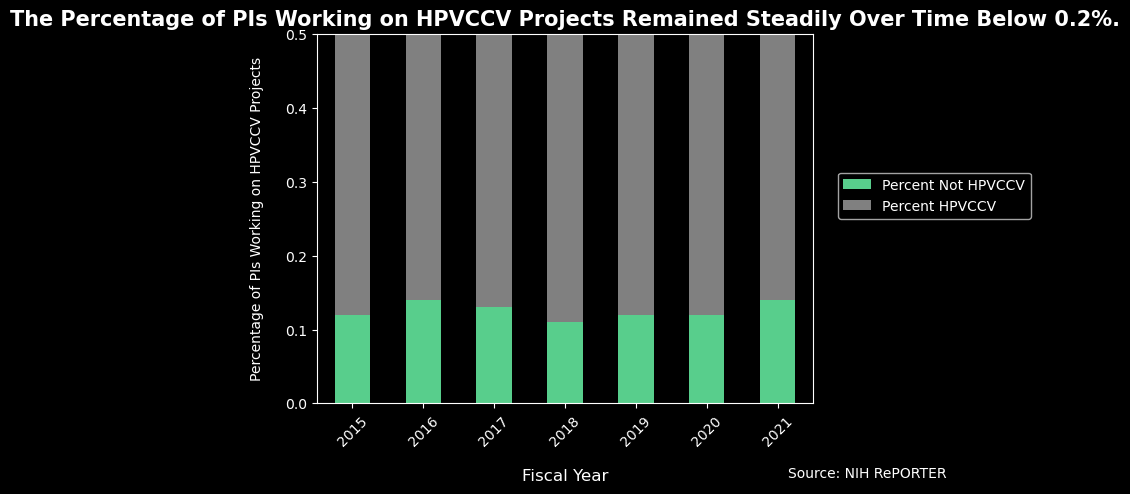

In [26]:
# Set the Background color (https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html)
plt.style.use('dark_background')

# Create stacked bar chart
yearly_PI = Annual_PI2.set_index('FY').plot(kind='bar', 
                                                  stacked=True, 
                                                  color=['#58CE8C', 'Grey'])
# Add the x label
plt.xlabel('Fiscal Year', fontsize=12, labelpad=15)
# Add the y label
plt.ylabel('Percentage of PIs Working on HPVCCV Projects', fontsize=10, labelpad=15)
# Add the tile
plt.title('The Percentage of PIs Working on HPVCCV Projects Remained Steadily Over Time Below 0.2%.', fontsize=15, fontweight='bold')

# add a data source 
plt.annotate('Source: NIH RePORTER', xy=(0.95,-0.20), xycoords="axes fraction")

#rotate x-axis labels
plt.xticks(rotation=45)


## create legend and put it to the right mid way up the graph
plt.legend(("Percent Not HPVCCV","Percent HPVCCV", ), loc = (1.05,0.50)) 
plt.ylim((0,0.5))

plt.show()

In [27]:
## Switch back to default style
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline

### <div class="alert alert-success"> For Checkpoint3, I made 2 lineplots and 1 a heatmap below. </div> 


### Lineplots  <a class="anchor" id="lineplots"></a>

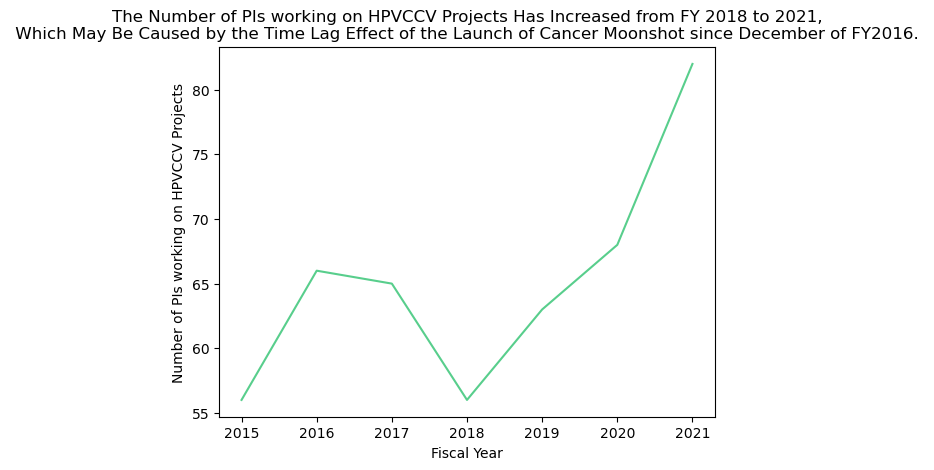

In [28]:
# calculate how many PIs are working on HPVCCV Projects each fiscal year
yearly_PIs_line = sns.lineplot(x = 'FY', 
                             y = 'Project_PIs', 
                             data = Project_PI, 
                             color='#58CE8C')
# Add the tile
# Add a title
yearly_PIs_line.set(xlabel ="Fiscal Year", 
# Change the y-axis label
                    ylabel = "Number of PIs working on HPVCCV Projects",
# Change the title
                    title = "The Number of PIs working on HPVCCV Projects Has Increased from FY 2018 to 2021,\n Which May Be Caused by the Time Lag Effect of the Launch of Cancer Moonshot since December of FY2016. ")

plt.show()

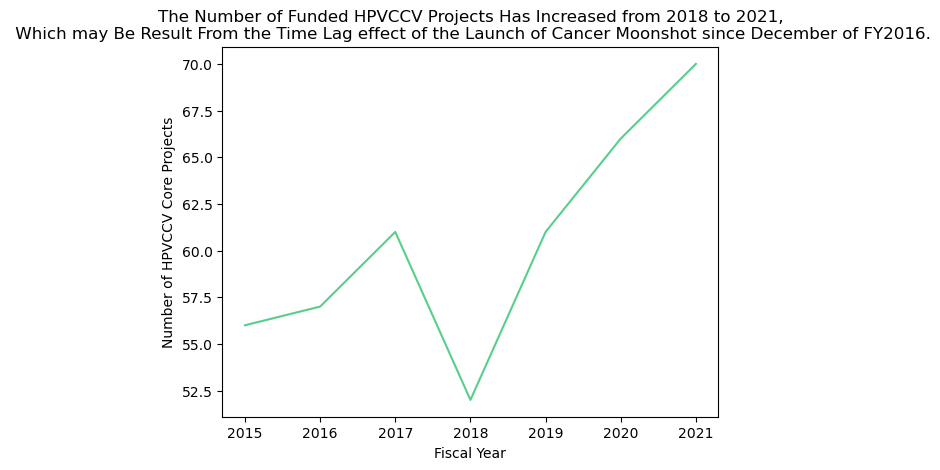

In [29]:
yearly_projects_line = sns.lineplot(x = 'FY', 
                             y = 'Core_Projects', 
                             data = Projects_Annual, 
                             color='#58CE8C')
# Add the tile
# Add a title
yearly_projects_line.set(xlabel ="Fiscal Year", 
# Change the y-axis label
                    ylabel = "Number of HPVCCV Core Projects",
# Change the title
                    title = "The Number of Funded HPVCCV Projects Has Increased from 2018 to 2021,\n Which may Be Result From the Time Lag effect of the Launch of Cancer Moonshot since December of FY2016.")

plt.show()

## Geopandas <a class="anchor" id="geopandas"></a>
GeoPandas is an open-source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and matplotlib for plotting.
In this section we will use the geopandas along with matplotlib to produce geospatial heat maps.

## Heat Map of the United States <a class="anchor" id="hm"></a>

#### Read in the Shape file
Please download the [tl_rd22_us_state.zip](https://drive.google.com/file/d/1M01wosaxtywlT8ss3lS04GPkR4zogIuz/view?usp=share_link) folder from the google drive, un-zip it and move it to the Data folder inside the PADM-GP_2505 folder you made for this class. Note, while we only read in the .shp file, you need all of the files in this folder to make geospatial images. 

In [30]:
# Use geopandas to read in the .shp file
states = geopandas.read_file(Path + '/tl_rd22_us_state/tl_rd22_us_state.shp')
type(states)

geopandas.geodataframe.GeoDataFrame

In [31]:
# Look at the first 3 observations
states.head(3)

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266296765,489206049,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138958484319,45975808217,+28.3989775,-082.5143005,"MULTIPOLYGON (((-86.39964 30.22696, -86.40262 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778461053,6216594318,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."


### Number of projects by State
We are going to creata a geospatial heat map of the U.S. where the color of each state depicts the nukber of Core Projects from the state. First we meed to prepair the data. 

In [32]:
# Calculate how many Projects each state
Project_st = Project_data.groupby(['ORG_STATE'])['CORE_PROJECT_NUM'].nunique().sort_values(ascending=False)
# Convert into a dataframe and reset index
Project_st = Project_st.to_frame().reset_index()

# Rename APPLICATION_ID to Total_Projects_2015
Project_st.rename(columns={'CORE_PROJECT_NUM':'Total_Core_Projects'}, inplace = True)

# View the first 2 observations 
Project_st.head(2)

,ORG_STATE,Total_Core_Projects
0,CA,17
1,NY,13


We need to link this data to the state geodataframe. Note, if we start with the `states` data and merge in the cancer_st data we end up with a geodataframe, however if we start with the cancer_st and merge in the states data we end up with a normal dataframe and not a geodataframe. This is important because we need a geodataframe to produce geospatial heat maps.

In [33]:
# Merge the cancer_st into the states data 
# where we use the STUSPS variable for the states data equals the ORG_STATE variable from the cancer_st data
Project_st2 = pd.merge(states, Project_st, left_on=  ['STUSPS'],
                   right_on= ['ORG_STATE'], how = 'inner')

# View the first 3 observations 
Project_st2.head(3)           

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,ORG_STATE,Total_Core_Projects
0,3,5,12,00294478,12,FL,Florida,00,G4000,A,138958484319,45975808217,+28.3989775,-082.5143005,"MULTIPOLYGON (((-86.39964 30.22696, -86.40262 ...",FL,4
1,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778461053,6216594318,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643...",IL,6
2,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206232157570,18949864226,+46.3159573,-094.1996043,"POLYGON ((-96.78438 46.63050, -96.78434 46.630...",MN,2


#### Make a quick heat map of the us

<AxesSubplot:>

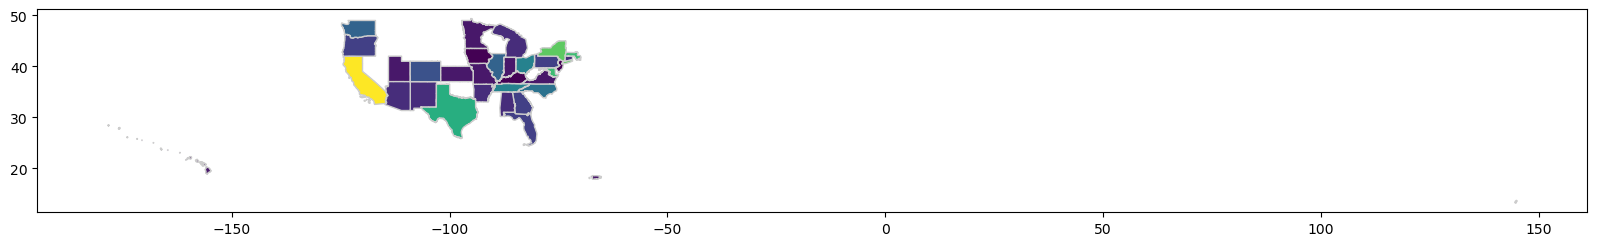

In [34]:
# Indicate the variable that should be used for the colors for the heat map
col = 'Total_Core_Projects'

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))

# Create the heat map of the US
Project_st2.plot(column = col, ax = ax, edgecolor='0.8', linewidth=1, cmap='viridis')


#### Focus on the continental U.S. 
When including the entire U.S. and all of its territories in the visual, it is difficult to make out specific states. Depending on your research question, it may be sufficient to focus on the continental U.S..

In [35]:
# Remove all of the small islands
Project_st3 = Project_st2[Project_st2['REGION'] != '9']
# Remove Hawaii
Project_st3 = Project_st3[Project_st3['STUSPS'] != 'HI']
# Remove Alaska
Project_st3 = Project_st3[Project_st3['STUSPS'] != 'AK']

### Make a Presentation Ready heat map of the us <a class="anchor" id="presentation_hm"></a>

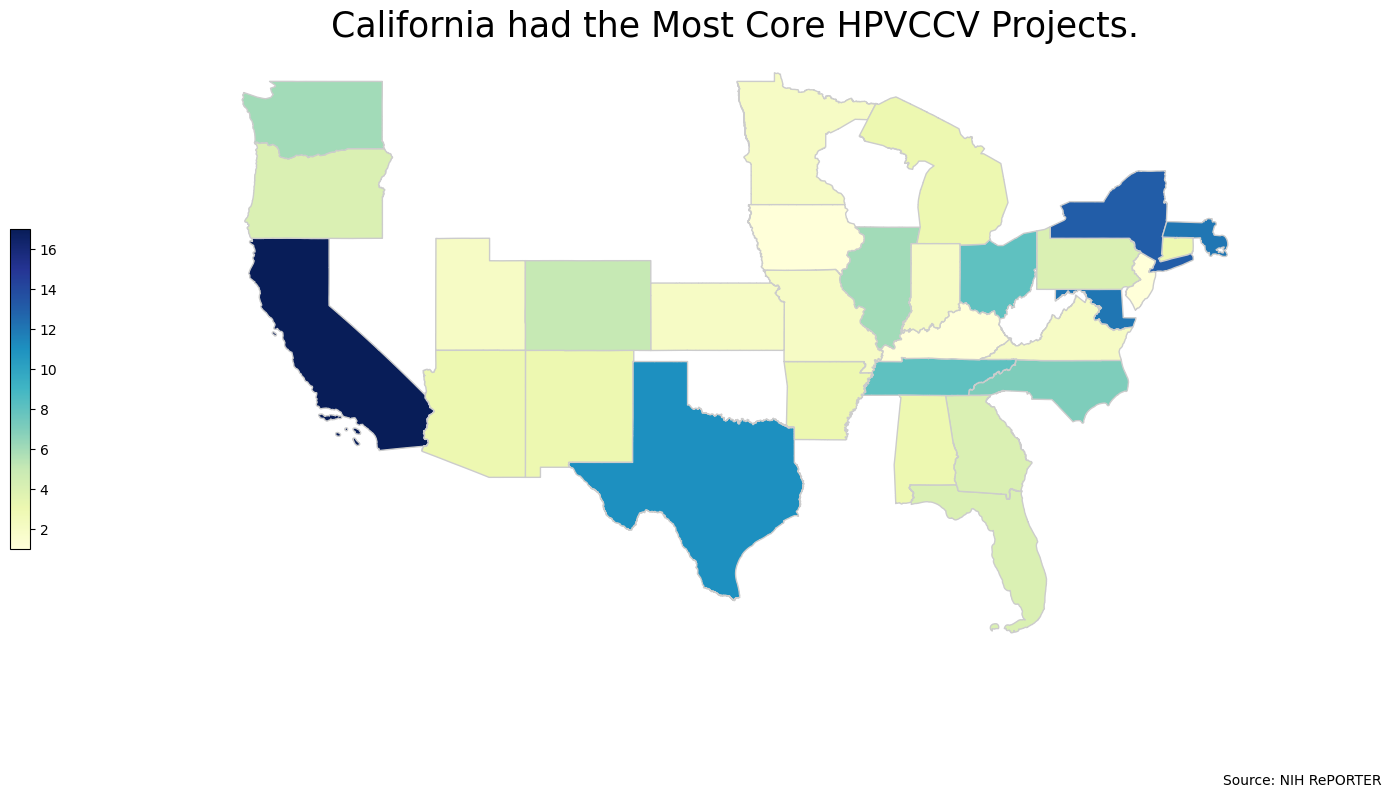

In [36]:
# Indicate the variable that should be used for the colors for the heat map
col = 'Total_Core_Projects'


# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))

# Remove the axis
ax.axis('off')

# Create the heat map of the US, use the viridis color palette 
Project_st3.plot(column=col, ax = ax, edgecolor = '0.8', linewidth = 1, cmap = 'YlGnBu')

# Give your figure a title
title = 'California had the Most Core HPVCCV Projects.'
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})


# add a data source 
# xy are measured in percent of axes length, from bottom left of graph:
plt.annotate('Source: NIH RePORTER', xy=(0.95,-0.20), xycoords="axes fraction")

# identify the max and min number of Cancer projects 
vmin = Project_st3[col].min()
vmax = Project_st3[col].max()
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='YlGnBu')

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

## More Resources  <a class="anchor" id="Resources"></a>

* [A Thorough Comparison of Python's DataViz Modules](https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair)

* [Seaborn Documentation](http://seaborn.pydata.org)

* [Matplotlib Documentation](https://matplotlib.org)

* [Advanced Functionality in Seaborn](blog.insightdatalabs.com/advanced-functionality-in-seaborn)

## More visuals  <a class="anchor" id="More"></a>
Below are a few visual types you might want to include in your projects. These are just quick and easy graphs, but you can add the same code we added to the bar plot to make presentation ready.

### Histogram   <a class="anchor" id="Histagram"></a>

In [37]:
#### plt.hist(fund_lim[fund_lim["FY"] == 2010].FY_TOTAL_COST, facecolor="y", bins=50, alpha=0.5)

In [38]:
Project_data.columns

Index(['index', 'APPLICATION_ID', 'CORE_PROJECT_NUM', 'FULL_PROJECT_NUM', 'FY',
       'IC_NAME', 'NIH_SPENDING_CATS', 'ORG_NAME', 'ORG_STATE', 'PI_NAMEs',
       'PROJECT_START', 'PROJECT_END', 'PROJECT_TITLE', 'TOTAL_COST'],
      dtype='object')

In [39]:
# Remove all 
hist_data = Project_data[Project_data["TOTAL_COST"].notnull()]
hist_data_15 = hist_data[hist_data["FY"] == 2015]
hist_data_21 = hist_data[hist_data["FY"] == 2021]

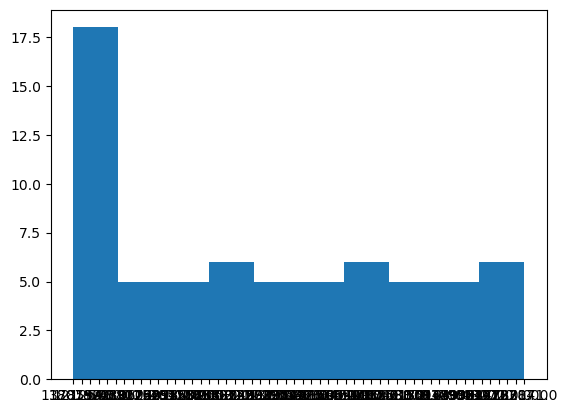

In [40]:
# Make a simple histogram:
# The plt.hist function draws histograms. You have to give it the dataframe and variable you want to plot
plt.hist(hist_data_15.TOTAL_COST)
plt.show()

### Layering in Matplotlib  <a class="anchor" id="Layering"></a>
This functionality - where we can make consecutive changes to the same plot - also allows us to layer on multiple plots. By default, the first graph you create will be at the bottom, with ensuing graphs on top.

Below, we see the 2010 histogram is beneath the 2015 histogram. You might also notice that the distribution of grant funding has shifted a bit over the years. 

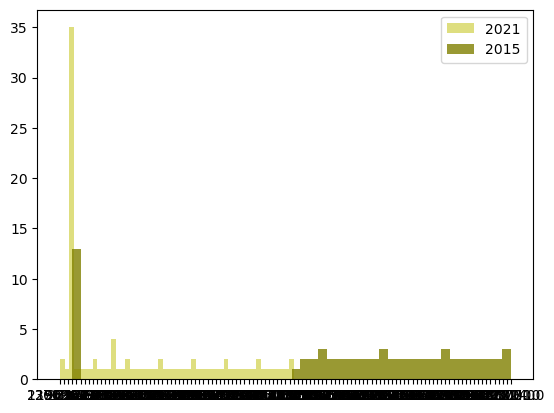

In [41]:
## Layering plots
plt.hist(hist_data_21.TOTAL_COST, facecolor="y", bins=50, alpha=0.5)
plt.hist(hist_data_15.TOTAL_COST, facecolor="olive", bins=50, alpha=0.8)

## create legend
plt.legend(("2021", "2015"), loc='upper right') 

plt.show()

## Other Python Visualization Libraries  <a class="anchor" id="Other"></a>

* [Bokeh](http://bokeh.pydata.org)

* [Altair](https://altair-viz.github.io)

* [ggplot](http://ggplot.yhathq.com.com)

* [Plotly](https://plot.ly)

### Exporting Completed Graphs

When you are satisfied with your visualization, you may want to save a a copy outside of your notebook. You can do this with `matplotlib`'s savefig function. You simply need to run:

plt.savefig("fileName.fileExtension")

The file extension is actually surprisingly important. Image formats like png and jpeg are actually **not ideal**. These file formats store your graph as a giant grid of pixels, which is space-efficient, but can't be edited later. Saving your visualizations instead as a PDF is strongly advised. PDFs are a type of vector image, which means all the component of the graph will be maintained.

With PDFs, you can later open the image in a program like Adobe Illustrator and make changes like the size or typeface of your text, move your legends, or adjust the colors of your visual encodings. All of this would be impossible with a png or jpeg.